In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings('ignore') #ignore ipython notebook warnings

In [3]:
dataset_loction = "/Users/sandylee/Google Drive/Flatiron School/london-ds-010620/mod_1/student/group_project/KayCee_master/source/kc_house_data.csv" #variable for dataset location

In [4]:
data = pd.read_csv(dataset_loction) #import dataset

In [5]:
duplicate_properties = data[data.duplicated(subset="id",keep=False)] #extract properties sold more than once into a new dataframe

In [6]:
duplicate_properties.insert(2,"time_diff",0) #add a column for time difference

In [7]:
duplicate_properties.insert(4,"price_diff",0) #add a column for price difference

In [8]:
duplicate_properties.insert(5,"rate_of_price_increase",0) #add a column for the rate of price increase

In [9]:
duplicate_properties["date"] = pd.to_datetime(duplicate_properties['date']) #convert date column to datetime objects from str

In [10]:
duplicate_properties["time_diff"] = pd.to_datetime(duplicate_properties['time_diff']) #convert time_diff column to datetime objects from str

In [11]:
duplicate_properties = duplicate_properties.reset_index() #reset index 

In [12]:
duplicate_properties = duplicate_properties.drop("index", 1) #drop duplicate index column

In [13]:
duplicate_properties = duplicate_properties.drop(317) #drop one entry from a property sold 3 times that is causing issues

In [14]:
duplicate_properties = duplicate_properties.reset_index() #reset index (again) 

In [15]:
duplicate_properties = duplicate_properties.drop("index", 1) #drop duplicate index column (again)

In [16]:
duplicate_properties['time_diff'] = duplicate_properties.groupby(['id'])['date'].shift(1) #run a lag operation on dates

In [17]:
duplicate_properties['price_diff'] = duplicate_properties.groupby(['id'])['price'].shift(1) #run a lag operation on prices

In [18]:
duplicate_properties["time_diff"] = duplicate_properties['date'] - duplicate_properties['time_diff'] #get the date difference and add it to 'time_diff' column

In [19]:
duplicate_properties["price_diff"] = duplicate_properties['price'] - duplicate_properties['price_diff'] #get the price difference and add it to 'price_diff' column

In [20]:
analysis_df = duplicate_properties.copy() #make a new dataframe for analysis

In [21]:
for row in range(0,len(analysis_df),2):
     analysis_df.drop(index=row,inplace=True) #remove redundant NaN rows 

In [22]:
analysis_df.insert(3,"time_diff_seconds",0) #add a column for time difference as an int

In [23]:
analysis_df["time_diff_seconds"] = pd.to_numeric(analysis_df["time_diff"])/1000000000 #convert timedelta obeject to seconds (stored as ns by default)

In [24]:
analysis_df["rate_of_price_increase"] = analysis_df["price_diff"]/(analysis_df["time_diff_seconds"]/86400) #calculate rate of increase in prices

In [25]:
hot_zip_codes = analysis_df.groupby(["zipcode"])["rate_of_price_increase"].mean() #create a Pandas series of rate of the mean rate of price inrease grouped by zip code

In [26]:
hot_zip_codes = analysis_df.groupby(["zipcode"]).mean() #group everything by zipcode and take the mean

In [27]:
hot_zip_codes_count = analysis_df.groupby(["zipcode"]).count() #group everything by zipcode and run a count 

In [28]:
hot_zip_codes.drop(columns = ["id", "time_diff_seconds", "price", "price_diff", "bedrooms", "bathrooms"],inplace = True) #remove extranous columns

In [29]:
hot_zip_codes.drop(columns = ["sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition"],inplace = True) #remove extranous columns

In [30]:
hot_zip_codes.drop(columns = ["grade", "sqft_above", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"],inplace = True) #remove extranous columns

In [31]:
hot_zip_codes.sort_values(ascending = False, inplace = True, by="rate_of_price_increase")  #sort hot zip codes in descending order

In [32]:
hot_zip_codes.reset_index(level=0, inplace=True)

In [33]:
hot_zip_codes = hot_zip_codes.sort_values(['rate_of_price_increase']).reset_index(drop=True)

In [34]:
y_axis = [98034, 
          98155, 
          98126, 
          98117, 
          98011, 
          98177, 
          98148, 
          98007, 
          98199, 
          98118, 
          98042, 
          98074, 
          98115, 
          98032, 
          98133, 
          98116, 
          98052, 
          98028, 
          98055, 
          98103, 
          98122, 
          98106, 
          98072, 
          98059, 
          98053, 
          98003, 
          98031, 
          98004, 
          98144, 
          98198, 
          98125, 
          98030, 
          98039, 
          98178, 
          98045, 
          98001, 
          98056, 
          98146, 
          98107, 
          98166, 
          98070, 
          98168, 
          98006, 
          98024, 
          98038, 
          98023, 
          98188, 
          98058, 
          98112, 
          98002, 
          98108, 
          98065, 
          98075, 
          98077, 
          98014, 
          98029, 
          98027, 
          98033, 
          98010]

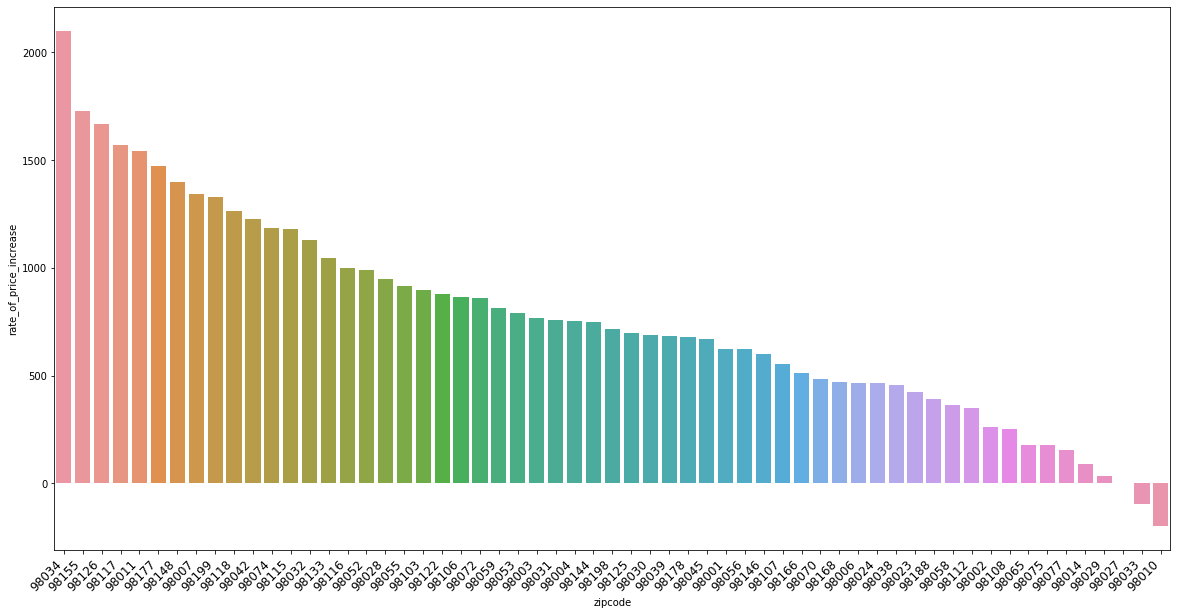

In [35]:
plt.figure(figsize=(20,10))
chart = sns.barplot(x = "zipcode", 
                    y = "rate_of_price_increase", 
                    data = hot_zip_codes, 
                    order = y_axis)

chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=45, 
                      horizontalalignment='right',
                      fontweight='light',
                      fontsize='large');


In [36]:
seasonality_df = data.copy() #copy main data

In [37]:
seasonality_df.insert(3,"month",0) #add a column for time month

In [38]:
seasonality_df.insert(4,"year",0) #add a column for time year

In [39]:
seasonality_df["date"] = pd.to_datetime(seasonality_df['date']) #convert date column to datetime objects from object

In [40]:
seasonality_df["month"] = seasonality_df["date"].dt.month #extract month 

In [41]:
seasonality_df["year"] = seasonality_df["date"].dt.year #extract year

In [136]:
per_month_houses_sold = seasonality_df.set_index('date').groupby(pd.Grouper(freq='M'))['id'].count() #create a Pandas series with number of houses sold

In [138]:
per_month_mean_price = seasonality_df.set_index('date').groupby(pd.Grouper(freq='M'))['price'].mean() #create a Pandas series with the monthly mean house prices

In [140]:
combined_month_data = pd.concat([per_month_houses_sold, per_month_mean_price], axis=1) #combine both into a data frame for the plot

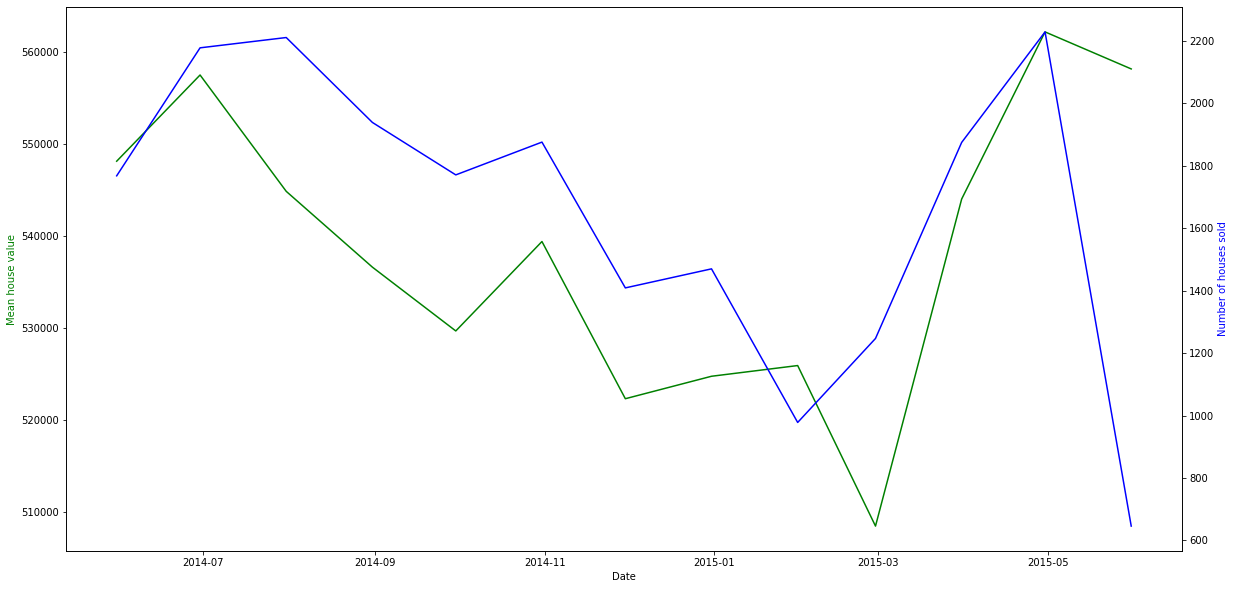

In [141]:
fig, ax1 = plt.subplots(figsize=(20,10)) #plot of houses sold versus number versus monthly average house price

ax2 = ax1.twinx()
ax1.plot(combined.index, combined["price"], 'g-')
ax2.plot(combined.index, combined["id"], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Mean house value', color='g')
ax2.set_ylabel('Number of houses sold', color='b')

plt.show()